**1. Importing required library**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load Dataset**

In [110]:
df=pd.read_csv('E:\Dataset_IBM\Churn_Modelling.csv')
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

**3. Perform Below Visualizations :**
    * Univariate Analysis
    * Bi - Variate Analysis
    * Multi - Variate Analysis

C:\Users\anmta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

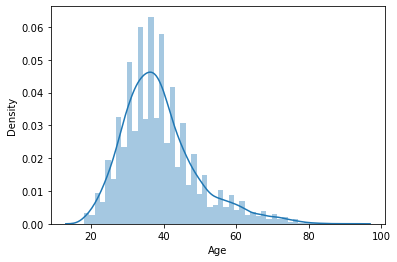

In [111]:
sns.distplot(df.Age) #univariate analysis

C:\Users\anmta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Balance'>

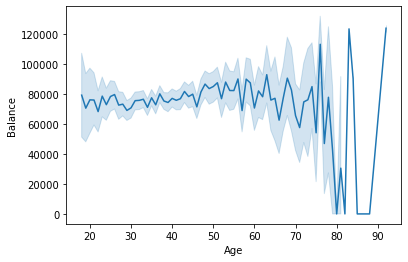

In [112]:
sns.lineplot(df.Age,df.Balance) #bivariate analysis

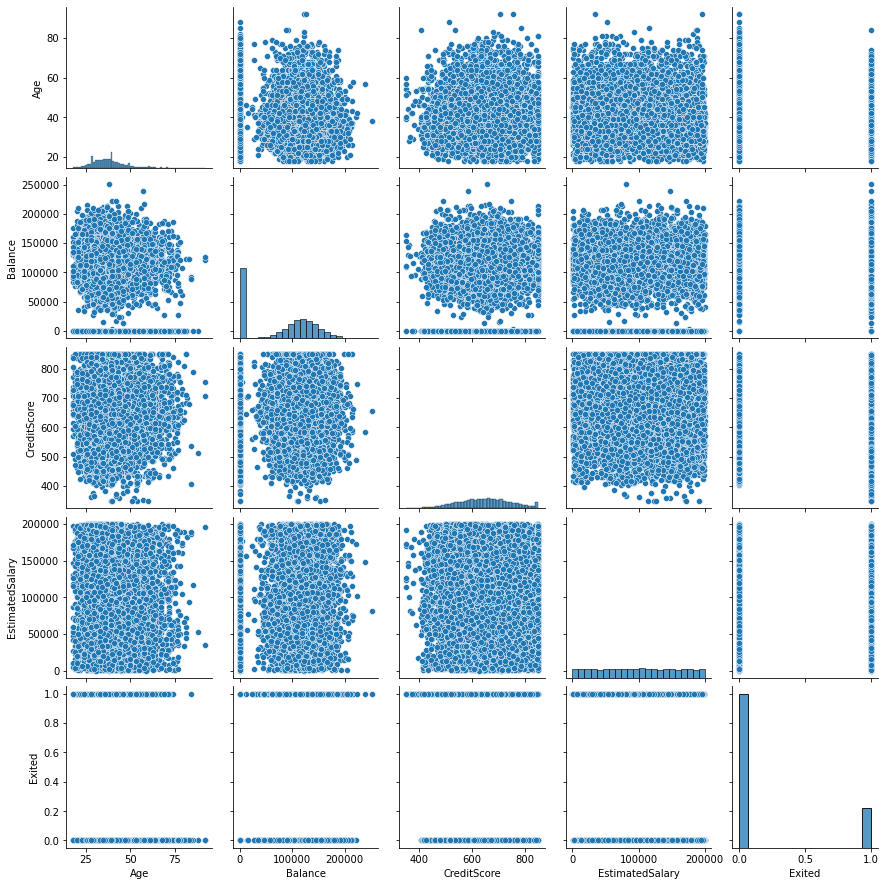

In [113]:
sns.pairplot(data=df[['Age','Balance','CreditScore','EstimatedSalary','Exited']])

**4. Perform descriptive statistics on the dataset**

In [114]:
df1 = pd.DataFrame(df)
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


 **5. Handle the Missing values.**

In [115]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**6. Find the outliers and replace the outliers**

**-     Outliers Identification using visualizations**

C:\Users\anmta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

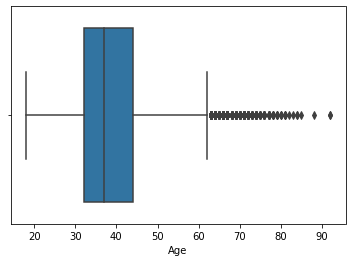

In [116]:
sns.boxplot(df['Age'],data=df)

<AxesSubplot:>

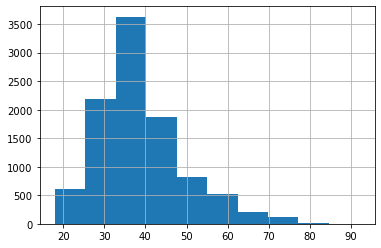

In [117]:
df['Age'].hist()

**- Outliers Identification using Interquatile Range**

In [118]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

12.0

**Replacing Outliers With The Mean, Median, Mode, or other Values**

In [119]:
median = df.loc[df['Age']<75, 'Age'].median()
df.loc[df.Age > 75, 'Age'] = np.nan
df.fillna(median,inplace=True)

OR you can use np.where

In [120]:
df["Age"] = np.where(df["Age"] >75, median,df['Age'])

C:\Users\anmta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

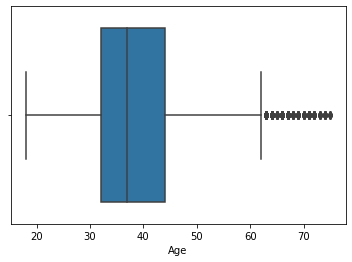

In [121]:
sns.boxplot(df['Age'],data=df)

<AxesSubplot:>

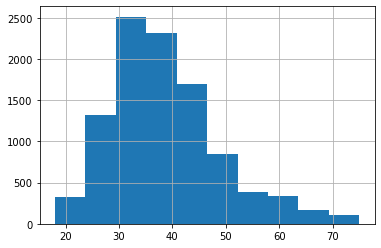

In [122]:
df['Age'].hist()

**7. Check for Categorical columns and perform encoding**

**Separating Categorical data and numerical data**

In [123]:
numCols = df.select_dtypes("number").columns
catCols = df.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [124]:
numCols

['CreditScore',
 'Exited',
 'Tenure',
 'RowNumber',
 'Age',
 'Balance',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'CustomerId',
 'NumOfProducts']

In [125]:
catCols

['Geography', 'Gender', 'Surname']

In [126]:
df_categorical = df[['Geography', 'Gender', 'Surname']]

In [127]:
df_categorical.head()

,Geography,Gender,Surname
0,France,Female,Hargrave
1,Spain,Female,Hill
2,France,Female,Onio
3,France,Female,Boni
4,Spain,Female,Mitchell


**Encodeing Categorical Columns**

In [128]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [129]:
label_encoder.fit(df_categorical['Gender'])

LabelEncoder()

In [130]:
label_values = label_encoder.transform(df_categorical['Gender'])

In [131]:
print("After Encoding:")
label_values

After Encoding:


array([0, 0, 0, ..., 0, 1, 0])

**8. Split the data into dependent and independent variables**

**Independent variables**

In [132]:
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


**Dependent variables**

In [133]:
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


**9. Scale the independent variables**

In [134]:
X=df.drop(['Geography', 'Gender', 'Surname'], axis=1)
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42.0,3,75075.31,2,1,0,92888.52,1


**MinMaxScaler**

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.00000000e+00 2.75616127e-01 5.38000000e-01 ... 1.00000000e+00
  5.06734893e-01 1.00000000e+00]
 [1.00010001e-04 3.26454364e-01 5.16000000e-01 ... 1.00000000e+00
  5.62708739e-01 0.00000000e+00]
 [2.00020002e-04 2.14421435e-01 3.04000000e-01 ... 0.00000000e+00
  5.69654352e-01 1.00000000e+00]
 ...
 [9.99799980e-01 7.53273144e-02 7.18000000e-01 ... 1.00000000e+00
  2.10390092e-01 1.00000000e+00]
 [9.99899990e-01 4.66636532e-01 8.44000000e-01 ... 0.00000000e+00
  4.64429053e-01 1.00000000e+00]
 [1.00000000e+00 2.50483021e-01 8.84000000e-01 ... 0.00000000e+00
  1.90914232e-01 0.00000000e+00]]


**StandardScaler**

In [136]:
from sklearn.preprocessing import StandardScaler
Scale= StandardScaler() 
data = Scale.fit_transform(X) 
print(data)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.97024255  0.02188649
   1.97716468]
 [-1.7315312  -0.60653412 -0.44003595 ...  0.97024255  0.21653375
  -0.50577476]
 [-1.73118479 -0.99588476 -1.53679418 ... -1.03067011  0.2406869
   1.97716468]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ...  0.97024255 -1.00864308
   1.97716468]
 [ 1.7315312  -0.11935577  1.25683526 ... -1.03067011 -0.12523071
   1.97716468]
 [ 1.73187761 -0.87055909  1.46377078 ... -1.03067011 -1.07636976
  -0.50577476]]


**10. Split the data into training and testing**

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [138]:
print(X_train)

      RowNumber  CustomerId  CreditScore   Age  Tenure    Balance  \
799         800    15567367          601  42.0       9  133636.16   
1069       1070    15628674          844  40.0       7  113348.14   
8410       8411    15609913          743  46.0       9       0.00   
9436       9437    15771000          684  38.0       4       0.00   
5099       5100    15731555          595  45.0       9  106000.12   
...         ...         ...          ...   ...     ...        ...   
9225       9226    15584928          594  32.0       4  120074.97   
4859       4860    15647111          794  22.0       4  114440.24   
3264       3265    15574372          738  35.0       5  161274.05   
9845       9846    15664035          590  38.0       9       0.00   
2732       2733    15592816          623  48.0       1  108076.33   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
799               1          0               1        103315.74       0  
1069              1    